In [ ]:
!git clone https://github.com/pjreddie/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
#git:This is the Git Command-line tool used for version control

#clone:this is a subcommand of git used to create a copy of a repository

In [ ]:
pwd     #Present Working Directory

'/content'

In [ ]:
cd /content/darknet/   #cd means change directory

/content/darknet


In [ ]:
ls        #list command

cfg/   examples/  LICENSE       LICENSE.gen  LICENSE.meta  LICENSE.v1  python/    scripts/
data/  include/   LICENSE.fuck  LICENSE.gpl  LICENSE.mit   Makefile    README.md  src/


The make command is typically used to build software projects based on instuctions provided in a Makefile

A Makefile is a special file used by the make command in unix like operating systems(including Linux and macOS) to automate the process of compiling and building software project it contains a set of instructions called rules that specify how to build the project, including compiling source code files linking libraries generating executable files.

In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-07-23 06:37:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  48.6MB/s    in 5.3s    

2024-07-23 06:37:32 (45.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect /content/darknet/cfg/yolov3.cfg /content/darknet/yolov3.weights /content/360_F_308546967_mUaAZk9TIExBVS5wqOAH3AqZcX97ii5K.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [12]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt

  img=cv2.imread(path)
  height,width=img.shape[:2]
  resize_img=cv2.resize(img,(3*width,3*height),interpolation=cv2.INTER_CUBIC)

  fig=plt.gcf()         #gcf=>get current figure
  plt.imshow(cv2.cvtColor(resize_img,cv2.COLOR_BGR2RGB))
  plt.show()

These are the new dimensions for the resized image. The image will be scaled up to three times its original width
and height.

plt.gcf(): Stands for "Get Current Figure". It returns the current figure object, which you can then modify or
save.

interpolation = cv2.INTER_CUBIC: This specifies the interpolation method. Cubic interpolation is used here,which is a good choice for resizing images as it provides a good balance between speed and quality.

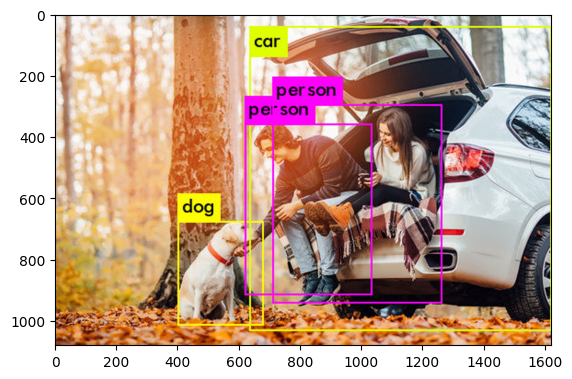

In [13]:
imShow('/content/darknet/predictions.jpg')

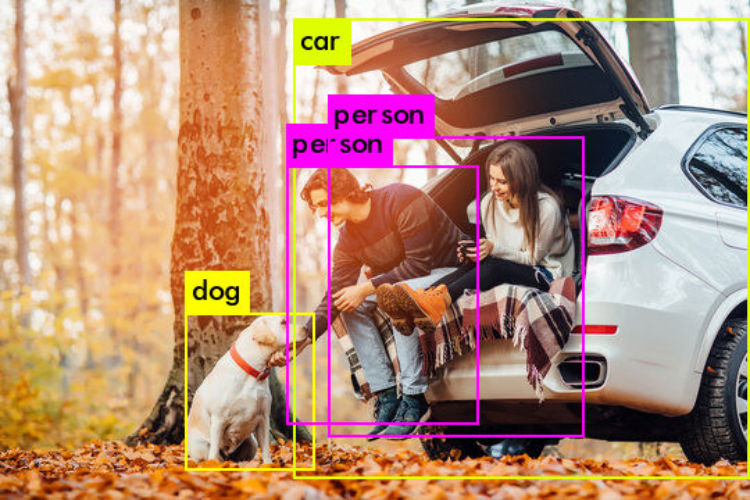

In [18]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/darknet/predictions.jpg')
img=cv2.resize(img,(750,500))
cv2_imshow(img)